In [1]:
import requests
from webdriver_manager.chrome import ChromeDriverManager as CDM
from bs4 import BeautifulSoup
import cv2
import urllib
import PIL
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import pytesseract
from selenium import webdriver
import easyocr

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [3]:
browser = webdriver.Chrome(CDM().install(),options=options)
browser.maximize_window()
browser.implicitly_wait(10)

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 94.0.4606
[WDM] - Get LATEST driver version for 94.0.4606
[WDM] - Driver [C:\Users\nvnsl\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache


In [4]:
try:
    browser.get("https://speedtest.net/")
    browser.switch_to.frame("google_ads_iframe_/6692/speedtest.net/stnext_top_rectangle_0")
    x=browser.page_source
except Exception as e:
    print(e)
#print(x)

In [5]:
ad_number = 1

In [6]:
soup1=BeautifulSoup(x,'html.parser')
image=soup1.find_all('img')
#print(image)
#print('')
#print('Ad link:',image[0]['src'])
for i in image:
    print("URL: {}".format(i['src']))
#imglink=image[0]['src']

URL: https://tpc.googlesyndication.com/simgad/5764385752492499293


In [7]:
check = 0
img_list=[]

In [8]:
for i in image:
    try:
        urllib.request.urlretrieve(i['src'], 'speedtest_ad{}.png'.format(ad_number)) 
        img = PIL.Image.open("speedtest_ad{}.png".format(ad_number))
        check+=1
        img_list.append(img)
        ad_number+=1
    except Exception as e:
        print(e)
        continue
print(img_list) 

try:
    img.save('pdf.pdf', "PDF" ,resolution=100.0, save_all=True, append_images=img_list)
except Exception as e:
    print(e)

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x1EE52AC3508>]


In [9]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [10]:
for j in range(1,check+1):
    try:
        data_eng = pytesseract.image_to_string(Image.open("speedtest_ad{}.png".format(j)), lang='eng')#process_image("sample.png", "eng")
        print(data_eng)
        file = open("text_of_ad{}.txt".format(j), "w+")
        file.write(data_eng)
        file.close()
        print("done")
    except Exception as e:
        print(e)
        continue

 

Speedtest
Mobile Apps

(7)

Try Speedtest”
for iOS and Android

 

done


In [11]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


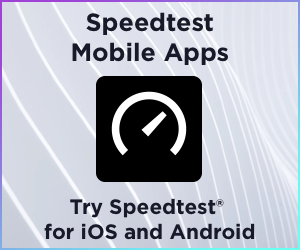

In [12]:
im = PIL.Image.open("speedtest_ad1.png")
im

In [13]:
bounds = reader.readtext('speedtest_ad1.png')
bounds

[([[83, 6], [216, 6], [216, 38], [83, 38]], 'Speedtest', 0.9999103535155576),
 ([[69, 37], [235, 37], [235, 73], [69, 73]],
  'Mobile Apps',
  0.9999598152468178),
 ([[68, 192], [226, 192], [226, 220], [68, 220]],
  'Try Speedtest:',
  0.5949453818873821),
 ([[40, 218], [258, 218], [258, 244], [40, 244]],
  'for iOS and Android',
  0.9514766751893388)]

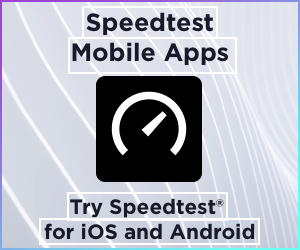

In [14]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], width=width)
    return image

draw_boxes(im, bounds)

In [15]:
import tensorflow as tf
import numpy as np
#import matplotlib.pyplot as plt
import os


<p>Referred the below code from https://github.com/ptnv-s/AdScrapper/blob/main/Ad_Scrapper.ipynb for logo detection</p>

In [16]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [17]:
%cd yolov5
%pip install setuptools --upgrade
%pip install -r requirements.txt

C:\Users\nvnsl\yolov5
Requirement already up-to-date: setuptools in d:\anaconda\lib\site-packages (58.2.0)
Note: you may need to restart the kernel to use updated packages.
  Using cached https://files.pythonhosted.org/packages/d1/c0/4fe04181b0210ee2647cfbb89ecd10a36eef89f10d8aca6a192c201bbe58/PyYAML-6.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/92/96/144f70b972a9c0eabbd4391ef93ccd49d0f2747f4f6a2a2738e99e5adc65/requests-2.26.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2d/eb/80f75ab480cfbd032442f06ec7c15ef88376c5ef7fd6f6bf2e0e03b47e31/tensorboard-2.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/10/5b/0479d7d845b5ba410ca702ffcd7f2cd95a14a4dfff1fde2637802b258b9b/seaborn-0.11.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6c/8b/22ce44e1c71558161a8bd54471123cc796589c7ebbfc15a7e8932e522f83/thop-0.0.31.post2005241907-py3-none-any.whl
  Using cached https://files.pyth

ERROR: conda 4.10.3 requires ruamel_yaml_conda>=0.11.14, which is not installed.
ERROR: easyocr 1.4.1 has requirement Pillow<8.3.0, but you'll have pillow 8.3.2 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.7.0 which is incompatible.
ERROR: Cannot uninstall 'PyYAML'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [18]:
%%bash
wget http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz
tar zxvf flickr_logos_27_dataset.tar.gz
cd flickr_logos_27_dataset
tar zxvf flickr_logos_27_dataset_images.tar.gz

flickr_logos_27_dataset/
flickr_logos_27_dataset/flickr_logos_27_dataset_distractor_set_urls.txt
flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt
flickr_logos_27_dataset/flickr_logos_27_dataset_query_set_annotation.txt
flickr_logos_27_dataset/flickr_logos_27_dataset_images.tar.gz
flickr_logos_27_dataset_images/
flickr_logos_27_dataset_images/2176584286.jpg
flickr_logos_27_dataset_images/3156402215.jpg
flickr_logos_27_dataset_images/3455836079.jpg
flickr_logos_27_dataset_images/4426526983.jpg
flickr_logos_27_dataset_images/2418409523.jpg
flickr_logos_27_dataset_images/2126991906.jpg
flickr_logos_27_dataset_images/13455389.jpg
flickr_logos_27_dataset_images/3209750863.jpg
flickr_logos_27_dataset_images/3334869821.jpg
flickr_logos_27_dataset_images/455131100.jpg
flickr_logos_27_dataset_images/3381786063.jpg
flickr_logos_27_dataset_images/3193687005.jpg
flickr_logos_27_dataset_images/2422219264.jpg
flickr_logos_27_dataset_images/339019736.jpg
flickr_logos_27_data

--2021-10-14 15:21:53--  http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz
Resolving image.ntua.gr (image.ntua.gr)... 147.102.11.1
Connecting to image.ntua.gr (image.ntua.gr)|147.102.11.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101827904 (97M) [application/x-gzip]
Saving to: â€˜flickr_logos_27_dataset.tar.gz.6â€™

     0K .......... .......... .......... .......... ..........  0% 1.58M 61s
    50K .......... .......... .......... .......... ..........  0% 10.3M 35s
   100K .......... .......... .......... .......... ..........  0% 7.59M 28s
   150K .......... .......... .......... .......... ..........  0% 21.3M 22s
   200K .......... .......... .......... .......... ..........  0% 4.48M 22s
   250K .......... .......... .......... .......... ..........  0% 6.70M 21s
   300K .......... .......... .......... .......... ..........  0% 15.5M 19s
   350K .......... .......... .......... .......... ..........  0% 8.67M 18s
   400K

In [19]:
path = r"C:\Users\nvnsl\yolov5\data\Train"
isFile = os.path.isdir(path)
print(isFile)
if isFile is False:
  os.mkdir(path)

True


In [20]:
f = open(r'C:\\Users\\nvnsl/yolov5\\flickr_logos_27_dataset\\flickr_logos_27_dataset_training_set_annotation.txt')
lines = f.read().split('\n')[:-1]
f.close()
input_path = r'C:\\Users\\nvnsl/yolov5\\flickr_logos_27_dataset\\flickr_logos_27_dataset_images\\'
for line in lines:
  print_buffer = []
  print(line)
  chunks = line.split(' ')
  name = chunks[0]
  class_id = 0
  xmin = float(chunks[3])
  xmax = float(chunks[5])
  ymin = float(chunks[4])
  ymax = float(chunks[6])
  img_path = r'C:\\Users\\nvnsl/yolov5\\flickr_logos_27_dataset\\flickr_logos_27_dataset_images\\'+ str(name) 
  img=PIL.Image.open(img_path)
  w= int(img.size[0])
  h= int(img.size[1])
  b_center_x = (xmin + xmax) / 2 
  b_center_y = (ymin + ymax) / 2
  b_width    = (xmax - xmin)
  b_height   = (ymax - ymin)
  b_center_x /= w 
  b_center_y /= h 
  b_width    /= w 
  b_height   /= h
  print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
  save_file_name = os.path.join(r'C:\\Users\\nvnsl\\yolov5\\data\\Train', name.replace("jpg", "txt"))
  print("\n".join(print_buffer), file= open(save_file_name, "w"))

144503924.jpg Adidas 1 38 12 234 142 
2451569770.jpg Adidas 1 242 208 413 331 
390321909.jpg Adidas 1 13 5 89 60 
4761260517.jpg Adidas 1 43 122 358 354 
4763210295.jpg Adidas 1 83 63 130 93 
4763210295.jpg Adidas 1 91 288 125 306 
4763210295.jpg Adidas 1 182 63 229 94 
4763210295.jpg Adidas 1 192 291 225 306 
4763210295.jpg Adidas 1 285 61 317 79 
4763210295.jpg Adidas 1 285 298 324 329 
4763210295.jpg Adidas 1 377 292 421 324 
4763210295.jpg Adidas 1 383 55 416 76 
1230939811.jpg Adidas 2 129 326 257 423 
1230939811.jpg Adidas 2 137 336 243 395 
2550056374.jpg Adidas 2 18 2 488 278 
3294282629.jpg Adidas 2 126 252 207 311 
3294282629.jpg Adidas 2 127 324 206 381 
3294282629.jpg Adidas 2 129 109 206 162 
3294282629.jpg Adidas 2 132 176 206 234 
3294282629.jpg Adidas 2 212 111 287 165 
3294282629.jpg Adidas 2 213 180 288 236 
3294282629.jpg Adidas 2 213 253 290 312 
3294282629.jpg Adidas 2 213 327 287 382 
3294282629.jpg Adidas 2 294 109 373 167 
3294282629.jpg Adidas 2 294 327 372 383

4763847308.jpg Adidas 6 407 2 446 34 
7787186.jpg Adidas 6 67 16 440 275 
2403699729.jpg Adidas 6 27 5 342 244 
3005794070.jpg Adidas 6 233 9 474 242 
4061203190.jpg Adidas 6 181 48 260 103 
4605631045.jpg Adidas 6 347 126 446 197 
4763207899.jpg Adidas 6 40 9 98 45 
4763207899.jpg Adidas 6 44 286 84 307 
4763207899.jpg Adidas 6 161 11 217 48 
4763207899.jpg Adidas 6 169 290 211 312 
4763207899.jpg Adidas 6 285 303 337 338 
4763207899.jpg Adidas 6 287 4 327 30 
4763207899.jpg Adidas 6 396 298 451 337 
4763207899.jpg Adidas 6 405 5 446 31 
2534155497.jpg Adidas 6 59 1 479 253 
3007885565.jpg Adidas 6 221 20 476 262 
4336482746.jpg Adidas 6 16 194 246 351 
451265524.jpg Adidas 6 195 179 244 215 
791925651.jpg Adidas 6 1 3 96 74 
1230939811.jpg Adidas 6 129 326 257 423 
1230939811.jpg Adidas 6 137 336 243 395 
2550056374.jpg Adidas 6 18 2 488 278 
3294282629.jpg Adidas 6 126 252 207 311 
3294282629.jpg Adidas 6 127 324 206 381 
3294282629.jpg Adidas 6 129 109 206 162 
3294282629.jpg Adida

3513049256.jpg Apple 6 179 65 304 206 
3766774652.jpg Apple 6 86 41 400 254 
4211723816.jpg Apple 6 110 157 175 229 
2274089022.jpg Apple 6 178 47 313 244 
4181108300.jpg Apple 6 152 271 170 292 
418635708.jpg Apple 6 4 5 176 207 
4211723460.jpg Apple 6 130 208 187 273 
4749057567.jpg Apple 6 41 19 468 432 
2401584750.jpg Apple 6 107 18 390 335 
299768792.jpg Apple 6 126 68 415 260 
3023420658.jpg Apple 6 171 115 298 237 
4210274024.jpg Apple 6 143 13 384 224 
442337651.jpg Apple 6 178 60 324 193 
3006946827.jpg Apple 6 79 17 444 310 
3065654531.jpg Apple 6 84 134 252 366 
3190306185.jpg Apple 6 321 257 373 299 
3261774945.jpg Apple 6 64 20 397 231 
3733440395.jpg Apple 6 12 127 74 196 
3733440395.jpg Apple 6 41 62 143 162 
3733440395.jpg Apple 6 80 5 206 106 
3733440395.jpg Apple 6 186 155 227 200 
3733440395.jpg Apple 6 225 155 252 184 
3733440395.jpg Apple 6 227 248 262 278 
3733440395.jpg Apple 6 229 201 262 234 
3733440395.jpg Apple 6 247 227 270 254 
3733440395.jpg Apple 6 252 19

4253102363.jpg Citroen 4 28 86 438 389 
4253102363.jpg Citroen 4 82 99 401 311 
2080839955.jpg Citroen 4 56 126 363 367 
2846084211.jpg Citroen 4 143 69 201 117 
3099884211.jpg Citroen 4 132 99 349 269 
3369768399.jpg Citroen 4 111 220 227 369 
3577850173.jpg Citroen 4 16 243 64 276 
3577850173.jpg Citroen 4 17 57 66 107 
3577850173.jpg Citroen 4 24 147 62 181 
3577850173.jpg Citroen 4 98 141 154 187 
3577850173.jpg Citroen 4 102 228 156 278 
3577850173.jpg Citroen 4 113 62 144 88 
3577850173.jpg Citroen 4 193 234 234 272 
3577850173.jpg Citroen 4 196 61 231 98 
3577850173.jpg Citroen 4 203 153 227 171 
3577850173.jpg Citroen 4 274 48 323 94 
3577850173.jpg Citroen 4 274 142 323 188 
3577850173.jpg Citroen 4 284 246 317 276 
3577850173.jpg Citroen 4 358 247 368 259 
3577850173.jpg Citroen 4 365 54 406 96 
3577850173.jpg Citroen 4 451 241 488 269 
3577850173.jpg Citroen 4 452 63 486 95 
1107796028.jpg Citroen 5 111 250 262 372 
3378307349.jpg Citroen 5 34 22 297 479 
3981421654.jpg Citr

194328418.jpg Cocacola 4 90 3 181 45 
246526320.jpg Cocacola 4 220 121 255 157 
2476100758.jpg Cocacola 4 48 130 253 222 
4200918689.jpg Cocacola 4 2 3 492 159 
542894584.jpg Cocacola 4 125 307 171 335 
542894584.jpg Cocacola 4 126 190 172 217 
542894584.jpg Cocacola 4 128 133 178 159 
542894584.jpg Cocacola 4 128 249 171 275 
542894584.jpg Cocacola 4 231 248 278 278 
542894584.jpg Cocacola 4 232 131 280 160 
542894584.jpg Cocacola 4 235 193 282 217 
2435838064.jpg Cocacola 4 6 6 320 345 
2962045.jpg Cocacola 4 207 57 385 210 
4023480867.jpg Cocacola 4 19 232 345 405 
4162347545.jpg Cocacola 4 57 180 302 263 
4427242482.jpg Cocacola 4 6 84 305 206 
1354674694.jpg Cocacola 4 11 16 110 76 
18945268.jpg Cocacola 4 1 246 72 282 
18945268.jpg Cocacola 4 3 83 75 121 
18945268.jpg Cocacola 4 3 164 70 201 
18945268.jpg Cocacola 4 3 326 63 362 
18945268.jpg Cocacola 4 75 326 150 351 
18945268.jpg Cocacola 4 77 158 157 199 
18945268.jpg Cocacola 4 79 3 157 39 
18945268.jpg Cocacola 4 79 238 157 

3468967682.jpg DHL 4 12 60 485 205 
3697311253.jpg DHL 4 148 270 322 305 
3828086787.jpg DHL 4 6 3 143 44 
4316401444.jpg DHL 4 84 94 187 164 
3193687005.jpg DHL 4 30 50 415 135 
3422008846.jpg DHL 4 17 12 481 101 
436255718.jpg DHL 4 87 132 199 177 
455162201.jpg DHL 4 2 1 153 20 
51660550.jpg DHL 4 370 185 497 231 
1412494805.jpg DHL 4 45 281 175 323 
1412494805.jpg DHL 4 299 158 335 219 
159166596.jpg DHL 4 146 136 289 177 
2209126349.jpg DHL 4 17 81 125 171 
3765988249.jpg DHL 4 33 239 136 266 
4764653103.jpg DHL 4 144 147 178 163 
4764653103.jpg DHL 4 255 121 336 178 
2180293872.jpg DHL 5 11 30 477 122 
2350505168.jpg DHL 5 84 130 121 154 
321721915.jpg DHL 5 56 278 310 336 
3788581334.jpg DHL 5 27 4 474 104 
4599548273.jpg DHL 5 1 2 131 38 
2090094285.jpg DHL 5 1 2 84 17 
2329810624.jpg DHL 5 13 5 486 113 
2989750063.jpg DHL 5 2 5 145 52 
4669468410.jpg DHL 5 6 1 486 99 
51660551.jpg DHL 5 286 263 444 317 
2792076321.jpg DHL 5 2 130 498 331 
3468967682.jpg DHL 5 12 60 485 205 
36

3206116179.jpg Ferrari 3 144 41 365 311 
3300554626.jpg Ferrari 3 106 9 385 328 
3571544780.jpg Ferrari 3 72 17 442 372 
43671206.jpg Ferrari 3 89 146 223 323 
3016882365.jpg Ferrari 4 56 128 239 338 
4115509028.jpg Ferrari 4 211 207 268 253 
456474304.jpg Ferrari 4 116 5 425 348 
4578493801.jpg Ferrari 4 112 283 284 433 
513227877.jpg Ferrari 4 138 92 361 306 
3270796445.jpg Ferrari 4 147 80 353 318 
3792061769.jpg Ferrari 4 62 24 426 486 
3979038472.jpg Ferrari 4 215 317 316 372 
4449683069.jpg Ferrari 4 114 35 359 342 
788959598.jpg Ferrari 4 118 255 260 407 
2201490255.jpg Ferrari 4 65 70 347 426 
3055058872.jpg Ferrari 4 153 67 358 347 
3455836079.jpg Ferrari 4 101 195 216 304 
4621612035.jpg Ferrari 4 22 19 294 475 
4758382348.jpg Ferrari 4 9 23 473 430 
1224628248.jpg Ferrari 4 140 36 414 327 
3206116179.jpg Ferrari 4 144 41 365 311 
3300554626.jpg Ferrari 4 106 9 385 328 
3571544780.jpg Ferrari 4 72 17 442 372 
43671206.jpg Ferrari 4 89 146 223 323 
1224626332.jpg Ferrari 5 64 

50302921.jpg Google 3 5 3 146 47 
2839448306.jpg Google 4 226 207 245 216 
3904333688.jpg Google 4 6 4 481 181 
4080113868.jpg Google 4 17 14 296 117 
428085258.jpg Google 4 42 116 457 270 
4493513795.jpg Google 4 130 114 350 201 
2533950636.jpg Google 4 3 16 275 109 
2777121253.jpg Google 4 7 12 199 68 
2777758833.jpg Google 4 59 10 331 107 
3958261033.jpg Google 4 18 6 476 163 
4759888406.jpg Google 4 2 3 275 106 
2132909220.jpg Google 4 4 6 199 77 
2774437111.jpg Google 4 59 17 353 123 
2786523391.jpg Google 4 54 8 343 105 
2898435362.jpg Google 4 3 5 269 100 
4353886132.jpg Google 4 137 16 345 99 
2766150734.jpg Google 4 77 28 367 121 
310688144.jpg Google 4 2 3 273 105 
4582547214.jpg Google 4 11 4 473 173 
4583055527.jpg Google 4 135 64 388 153 
4583055527.jpg Google 4 138 173 271 224 
50302921.jpg Google 4 5 3 146 47 
272645705.jpg Google 5 33 129 485 295 
2783736621.jpg Google 5 44 5 374 116 
3101679471.jpg Google 5 20 146 445 304 
3231215333.jpg Google 5 14 8 155 57 
323121533

3969698402.jpg Heineken 6 104 56 375 221 
3969698402.jpg Heineken 6 108 4 373 323 
4013254976.jpg Heineken 6 2 8 98 87 
3190556167.jpg Heineken 6 41 38 352 264 
3510604107.jpg Heineken 6 17 17 488 489 
3860951501.jpg Heineken 6 210 194 295 250 
4405304896.jpg Heineken 6 246 171 348 302 
4405304896.jpg Heineken 6 361 161 464 292 
4602079969.jpg Heineken 6 23 30 338 417 
3800082210.jpg Heineken 6 1 4 406 451 
3890972492.jpg Heineken 6 358 198 477 263 
4169127109.jpg Heineken 6 13 48 160 173 
4169127109.jpg Heineken 6 41 168 127 226 
447227594.jpg Heineken 6 113 194 201 262 
786529071.jpg Heineken 6 395 94 427 144 
2169121853.jpg Heineken 6 4 6 145 102 
4373836086.jpg Heineken 6 120 151 234 261 
4458514217.jpg Heineken 6 82 32 259 288 
4553341804.jpg Heineken 6 348 67 383 86 
4553341804.jpg Heineken 6 423 63 457 86 
4623943974.jpg Heineken 6 151 5 385 96 
170557401.jpg Heineken 6 2 150 494 228 
170557401.jpg Heineken 6 119 294 171 312 
170557401.jpg Heineken 6 242 301 293 317 
3147491623.

320803742.jpg Intel 6 105 112 437 333 
3767119813.jpg Intel 6 189 53 209 82 
3767119813.jpg Intel 6 204 140 245 166 
582467906.jpg Intel 6 71 24 386 277 
1925162720.jpg Intel 6 32 19 309 211 
2652633857.jpg Intel 6 0 0 450 300 
320803821.jpg Intel 6 85 44 479 352 
4600427219.jpg Intel 6 334 162 378 193 
79556016.jpg Intel 6 3 3 103 71 
189568643.jpg Intel 6 268 192 458 306 
198509094.jpg Intel 6 352 5 431 53 
2407784266.jpg Intel 6 32 29 467 319 
4645582512.jpg Intel 6 363 7 488 110 
516366872.jpg Intel 6 79 31 346 191 
2913811697.jpg McDonalds 1 357 250 375 267 
3091292844.jpg McDonalds 1 20 88 135 180 
3091292844.jpg McDonalds 1 165 270 260 349 
3261970877.jpg McDonalds 1 4 26 301 302 
3473801010.jpg McDonalds 1 106 87 394 318 
3497593254.jpg McDonalds 1 162 156 218 226 
142479250.jpg McDonalds 2 269 45 306 77 
2073826793.jpg McDonalds 2 151 11 392 206 
3835918737.jpg McDonalds 2 167 12 343 150 
3933416555.jpg McDonalds 2 201 104 260 155 
4757315595.jpg McDonalds 2 71 205 147 271 
47

3320880343.jpg Mini 5 154 176 284 246 
3528741517.jpg Mini 5 68 20 389 297 
427097328.jpg Mini 5 128 122 358 215 
1381841108.jpg Mini 5 136 100 294 161 
1408921955.jpg Mini 5 44 117 460 304 
2792546855.jpg Mini 5 3 64 495 268 
2865521932.jpg Mini 5 25 30 411 231 
4505787674.jpg Mini 5 3 20 294 146 
250858537.jpg Mini 6 2 81 492 302 
2516793607.jpg Mini 6 307 146 468 208 
3284636128.jpg Mini 6 406 106 450 125 
3405883135.jpg Mini 6 105 211 401 339 
427099501.jpg Mini 6 39 66 470 260 
108232417.jpg Mini 6 109 84 414 219 
109950015.jpg Mini 6 18 12 480 290 
123937306.jpg Mini 6 5 4 491 208 
3323870855.jpg Mini 6 42 88 405 264 
4002343429.jpg Mini 6 179 74 363 248 
18581717.jpg Mini 6 2 10 494 336 
2224243813.jpg Mini 6 29 13 486 306 
3320878793.jpg Mini 6 203 231 354 294 
4064818171.jpg Mini 6 54 6 469 277 
43608011.jpg Mini 6 18 13 110 56 
117933049.jpg Mini 6 4 23 273 207 
3579477706.jpg Mini 6 4 91 469 337 
4254091188.jpg Mini 6 15 152 479 353 
4443388098.jpg Mini 6 57 66 435 220 
4551

4043571759.jpg Nike 6 325 90 348 115 
4573390606.jpg Nike 6 8 6 476 214 
229746392.jpg Nike 6 19 166 146 226 
229746392.jpg Nike 6 22 17 299 132 
229746392.jpg Nike 6 177 163 302 228 
3168295809.jpg Nike 6 97 72 321 201 
3948869874.jpg Nike 6 185 200 300 254 
4416492947.jpg Nike 6 21 38 145 106 
4416492947.jpg Nike 6 163 41 292 106 
4416492947.jpg Nike 6 316 41 441 106 
513620863.jpg Nike 6 60 204 199 295 
513620863.jpg Nike 6 77 192 120 216 
2531530868.jpg Nike 6 37 139 360 285 
2855164257.jpg Nike 6 5 142 386 303 
2891341625.jpg Nike 6 39 71 355 210 
4316555119.jpg Nike 6 125 98 437 206 
605288903.jpg Nike 6 395 103 457 138 
2960027434.jpg Pepsi 1 11 7 128 130 
2960027434.jpg Pepsi 1 129 5 263 130 
3117510822.jpg Pepsi 1 2 339 38 368 
3117510822.jpg Pepsi 1 6 16 71 92 
3117510822.jpg Pepsi 1 11 111 75 176 
3117510822.jpg Pepsi 1 16 195 88 256 
3117510822.jpg Pepsi 1 23 262 92 328 
3117510822.jpg Pepsi 1 78 345 121 370 
3117510822.jpg Pepsi 1 174 348 206 374 
3117510822.jpg Pepsi 1 25

3759339764.jpg Pepsi 4 14 472 80 493 
3759339764.jpg Pepsi 4 15 425 69 461 
3759339764.jpg Pepsi 4 16 234 81 276 
3759339764.jpg Pepsi 4 22 374 67 412 
3759339764.jpg Pepsi 4 23 335 74 366 
2519368987.jpg Pepsi 5 134 125 186 194 
2519368987.jpg Pepsi 5 415 120 446 193 
3103735966.jpg Pepsi 5 99 33 265 162 
3103735966.jpg Pepsi 5 106 198 427 331 
3177582448.jpg Pepsi 5 13 5 103 86 
3177582448.jpg Pepsi 5 152 128 241 223 
3528942547.jpg Pepsi 5 57 57 109 102 
3528942547.jpg Pepsi 5 329 54 371 98 
4756751062.jpg Pepsi 5 179 117 319 255 
2650497443.jpg Pepsi 5 60 145 126 201 
2650497443.jpg Pepsi 5 382 137 435 197 
2983583413.jpg Pepsi 5 39 23 193 162 
2983583413.jpg Pepsi 5 274 30 419 162 
3002642406.jpg Pepsi 5 97 109 267 256 
3088829946.jpg Pepsi 5 9 66 138 128 
3088829946.jpg Pepsi 5 12 68 66 125 
3088829946.jpg Pepsi 5 25 198 144 252 
3088829946.jpg Pepsi 5 32 200 82 251 
3088829946.jpg Pepsi 5 44 313 155 357 
3088829946.jpg Pepsi 5 77 4 136 59 
3088829946.jpg Pepsi 5 90 133 214 192 


3547613093.jpg Porsche 5 79 98 119 143 
3547613093.jpg Porsche 5 81 149 118 191 
3547613093.jpg Porsche 5 104 4 189 113 
3547613093.jpg Porsche 5 127 118 188 196 
4185417313.jpg Porsche 5 226 95 403 285 
4208076672.jpg Porsche 5 5 4 296 361 
1402065041.jpg Porsche 5 205 182 330 292 
1690276845.jpg Porsche 5 181 113 323 271 
4213412628.jpg Porsche 5 170 166 312 337 
4506432358.jpg Porsche 5 102 2 200 116 
4537970631.jpg Porsche 5 91 18 205 156 
4077900663.jpg Porsche 5 95 161 260 381 
4507852944.jpg Porsche 5 95 3 212 118 
452091543.jpg Porsche 5 90 94 170 176 
4598657721.jpg Porsche 5 56 45 408 339 
538649986.jpg Porsche 5 66 168 317 365 
2795207851.jpg Porsche 5 117 164 281 359 
3301525494.jpg Porsche 5 90 30 428 362 
4315831502.jpg Porsche 5 52 149 274 397 
4472726837.jpg Porsche 5 70 46 437 368 
4491308340.jpg Porsche 5 97 3 203 117 
1639660678.jpg Porsche 6 263 72 407 262 
3563528611.jpg Porsche 6 46 8 433 321 
360966316.jpg Porsche 6 14 46 352 462 
4534861651.jpg Porsche 6 160 13 

2246298716.jpg RedBull 5 289 138 417 207 
2615405816.jpg RedBull 5 189 212 248 243 
3373563795.jpg RedBull 5 161 265 210 295 
1358914296.jpg RedBull 5 191 153 401 253 
3618901730.jpg RedBull 5 8 83 490 258 
3951357997.jpg RedBull 5 21 2 491 180 
4152834821.jpg RedBull 5 4 1 241 131 
4225050520.jpg RedBull 5 5 20 492 258 
2073319900.jpg RedBull 5 119 103 225 192 
3101502490.jpg RedBull 5 2 2 330 202 
3223329020.jpg RedBull 5 21 28 211 102 
3223329020.jpg RedBull 5 271 30 458 104 
3373561589.jpg RedBull 5 50 13 339 129 
3373561589.jpg RedBull 5 248 254 274 268 
3585256422.jpg RedBull 5 411 127 458 158 
1508285598.jpg RedBull 5 216 148 308 197 
2463686290.jpg RedBull 5 46 103 171 204 
2463686290.jpg RedBull 5 88 91 167 153 
2662264721.jpg RedBull 5 3 197 3 197 
4429895221.jpg RedBull 5 4 2 195 65 
4707086638.jpg RedBull 5 270 236 350 286 
310764290.jpg RedBull 5 5 9 493 320 
310764290.jpg RedBull 5 9 80 490 248 
3580857943.jpg RedBull 5 96 151 243 262 
3580857943.jpg RedBull 5 349 159 409

3539566827.jpg Sprite 4 264 300 306 335 
3539566827.jpg Sprite 4 268 255 300 283 
3539566827.jpg Sprite 4 308 244 345 275 
3539566827.jpg Sprite 4 311 195 339 226 
3539566827.jpg Sprite 4 315 149 343 177 
3539566827.jpg Sprite 4 353 147 383 175 
3539566827.jpg Sprite 4 353 194 381 222 
3539566827.jpg Sprite 4 356 241 383 270 
3539566827.jpg Sprite 4 360 48 388 76 
3539566827.jpg Sprite 4 360 97 390 129 
3539566827.jpg Sprite 4 389 232 418 259 
3539566827.jpg Sprite 4 390 187 420 217 
3539566827.jpg Sprite 4 394 99 421 124 
3539566827.jpg Sprite 4 401 55 423 79 
3539566827.jpg Sprite 4 409 144 419 174 
4330810490.jpg Sprite 4 134 209 201 265 
4330810490.jpg Sprite 4 250 230 329 292 
4750267378.jpg Sprite 4 36 56 341 250 
3342270648.jpg Sprite 5 32 58 167 150 
42948260.jpg Sprite 5 10 6 184 181 
2801899525.jpg Sprite 5 66 156 245 303 
3544071352.jpg Sprite 5 92 205 188 280 
4213622833.jpg Sprite 5 255 341 279 371 
193274877.jpg Sprite 5 46 92 168 298 
2244358347.jpg Sprite 5 23 80 453 39

2562313655.jpg Starbucks 4 30 116 169 262 
2562313655.jpg Starbucks 4 176 117 317 257 
2562313655.jpg Starbucks 4 323 116 476 261 
2568847460.jpg Starbucks 4 88 87 293 296 
2568847460.jpg Starbucks 4 349 141 490 258 
2818828296.jpg Starbucks 4 187 69 388 280 
2993064866.jpg Starbucks 4 102 49 343 275 
3778060828.jpg Starbucks 4 7 10 303 303 
2416565238.jpg Starbucks 4 5 1 496 328 
2418409523.jpg Starbucks 4 109 222 237 338 
3239862307.jpg Starbucks 4 5 4 388 389 
389081363.jpg Starbucks 4 68 16 288 315 
389081363.jpg Starbucks 4 362 98 482 338 
4191201241.jpg Starbucks 4 3 71 448 327 
229840376.jpg Starbucks 4 102 171 145 215 
229840376.jpg Starbucks 4 146 158 194 208 
229840376.jpg Starbucks 4 195 151 249 199 
2422219264.jpg Starbucks 4 4 62 256 308 
2422219264.jpg Starbucks 4 276 66 476 311 
2920059304.jpg Starbucks 4 179 122 341 273 
444194253.jpg Starbucks 4 51 21 446 365 
4576205927.jpg Starbucks 4 33 103 171 243 
4576205927.jpg Starbucks 4 179 102 313 242 
4576205927.jpg Starbuck

4367483371.jpg Texaco 5 44 11 441 392 
2175802759.jpg Texaco 5 122 50 367 320 
2176584286.jpg Texaco 5 95 67 378 359 
2515731280.jpg Texaco 5 103 94 395 391 
3906521939.jpg Texaco 5 84 112 263 254 
3906524725.jpg Texaco 5 177 228 295 339 
2920077270.jpg Texaco 5 312 129 340 162 
3907298910.jpg Texaco 5 160 148 261 250 
3907307172.jpg Texaco 5 121 62 393 314 
4223850527.jpg Texaco 5 67 17 447 325 
4290942909.jpg Texaco 5 415 2 480 70 
2698169582.jpg Texaco 6 87 268 106 279 
2698169582.jpg Texaco 6 145 267 155 279 
3153222474.jpg Texaco 6 13 79 58 122 
3153222474.jpg Texaco 6 125 331 153 364 
3153222474.jpg Texaco 6 147 8 198 67 
3776295441.jpg Texaco 6 45 171 107 230 
3907306056.jpg Texaco 6 200 192 287 276 
4456691378.jpg Texaco 6 43 32 327 292 
2926640633.jpg Texaco 6 280 276 343 342 
3349950493.jpg Texaco 6 144 319 228 383 
3349950493.jpg Texaco 6 155 105 187 139 
3907299992.jpg Texaco 6 201 169 299 255 
4079945682.jpg Texaco 6 204 171 288 250 
4570784808.jpg Texaco 6 35 135 132 190 

4283515433.jpg Unicef 6 26 215 64 230 
4283515433.jpg Unicef 6 85 170 123 182 
4283515433.jpg Unicef 6 113 208 120 217 
2867420595.jpg Unicef 6 5 6 277 74 
320988995.jpg Unicef 6 203 201 266 228 
320988995.jpg Unicef 6 380 138 438 172 
4346890164.jpg Unicef 6 201 27 394 166 
4621621793.jpg Unicef 6 299 66 344 77 
4771736332.jpg Unicef 6 211 176 221 197 
4771736332.jpg Unicef 6 404 310 423 321 
3490411517.jpg Unicef 6 4 52 489 218 
4283515483.jpg Unicef 6 147 60 227 104 
4283515483.jpg Unicef 6 162 131 205 160 
4283515483.jpg Unicef 6 204 119 229 156 
4283515483.jpg Unicef 6 311 55 344 87 
4283515483.jpg Unicef 6 315 112 347 154 
4283515483.jpg Unicef 6 352 8 496 72 
4283515483.jpg Unicef 6 354 100 496 172 
4283515483.jpg Unicef 6 356 220 495 296 
4288066329.jpg Unicef 6 191 166 288 198 
4371354206.jpg Unicef 6 343 127 357 154 
4371354206.jpg Unicef 6 346 168 412 201 
4771691508.jpg Unicef 6 316 198 340 228 
4771691508.jpg Unicef 6 332 308 424 329 
4771691508.jpg Unicef 6 428 194 492 21

4152379789.jpg Vodafone 6 138 384 184 426 
4152379789.jpg Vodafone 6 139 174 184 209 
4152379789.jpg Vodafone 6 140 266 193 315 
4152379789.jpg Vodafone 6 142 13 191 55 
4152379789.jpg Vodafone 6 144 220 175 243 
4152379789.jpg Vodafone 6 148 82 176 112 
4152379789.jpg Vodafone 6 148 129 185 153 
4152379789.jpg Vodafone 6 156 325 192 361 
4152379789.jpg Vodafone 6 184 31 238 61 
4152379789.jpg Vodafone 6 193 233 256 281 
4152379789.jpg Vodafone 6 195 57 249 98 
4152379789.jpg Vodafone 6 195 104 235 129 
4152379789.jpg Vodafone 6 200 144 245 173 
4152379789.jpg Vodafone 6 207 191 250 230 
4152379789.jpg Vodafone 6 209 414 255 450 
4152379789.jpg Vodafone 6 210 293 255 334 
4152379789.jpg Vodafone 6 224 351 260 388 
4152379789.jpg Vodafone 6 237 34 288 75 
4152379789.jpg Vodafone 6 244 104 304 147 
4152379789.jpg Vodafone 6 250 71 292 109 
4152379789.jpg Vodafone 6 252 155 307 190 
4152379789.jpg Vodafone 6 267 195 311 232 
4152379789.jpg Vodafone 6 280 45 337 85 
4152379789.jpg Vodafone

In [21]:
annotations = [os.path.join(r'C:/Users/nvnsl/yolov5/data/Train', x) for x in os.listdir(r'C:/Users/nvnsl/yolov5/data/Train') if x[-3:] == "txt"]

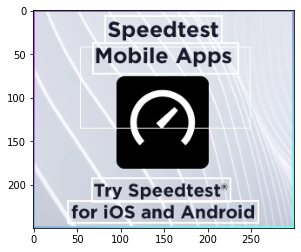

In [22]:
import random
random.seed(6)



def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)
    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
file = open(annotation_file)
annotation_list = file.read().split("\n")[:-1]
annotation_list = [x.split(" ") for x in annotation_list]
annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("data/Train", "flickr_logos_27_dataset/flickr_logos_27_dataset_images").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = PIL.Image.open(image_file)
#Plot the Bounding Box
plot_bounding_box(im, annotation_list)